In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import cv2
from PIL import Image
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
train_data_path = 'D:\\NSP\\data\\Train'
test_data_path = 'D:\\NSP\\data\\Test'
train_data_folders = []
test_data_folders = []
for folders in os.listdir(train_data_path):
    train_data_folders.append(os.path.join(train_data_path, folders))
for folders in os.listdir(test_data_path):
    test_data_folders.append(os.path.join(test_data_path, folders))

train_data_folders.sort()
test_data_folders.sort()
len(train_data_folders), len(test_data_folders)

(18, 14)

In [25]:
train_data_folders

['D:\\NSP\\data\\Train\\freshapples',
 'D:\\NSP\\data\\Train\\freshbanana',
 'D:\\NSP\\data\\Train\\freshbittergroud',
 'D:\\NSP\\data\\Train\\freshcapsicum',
 'D:\\NSP\\data\\Train\\freshcucumber',
 'D:\\NSP\\data\\Train\\freshokra',
 'D:\\NSP\\data\\Train\\freshoranges',
 'D:\\NSP\\data\\Train\\freshpotato',
 'D:\\NSP\\data\\Train\\freshtomato',
 'D:\\NSP\\data\\Train\\rottenapples',
 'D:\\NSP\\data\\Train\\rottenbanana',
 'D:\\NSP\\data\\Train\\rottenbittergroud',
 'D:\\NSP\\data\\Train\\rottencapsicum',
 'D:\\NSP\\data\\Train\\rottencucumber',
 'D:\\NSP\\data\\Train\\rottenokra',
 'D:\\NSP\\data\\Train\\rottenoranges',
 'D:\\NSP\\data\\Train\\rottenpotato',
 'D:\\NSP\\data\\Train\\rottentomato']

In [26]:
train_categories = []
test_categories = []
for category in train_data_folders:
    train_categories.append((category[18:]))
for category in test_data_folders:
    test_categories.append((category[17:]))
train_categories, test_categories

(['freshapples',
  'freshbanana',
  'freshbittergroud',
  'freshcapsicum',
  'freshcucumber',
  'freshokra',
  'freshoranges',
  'freshpotato',
  'freshtomato',
  'rottenapples',
  'rottenbanana',
  'rottenbittergroud',
  'rottencapsicum',
  'rottencucumber',
  'rottenokra',
  'rottenoranges',
  'rottenpotato',
  'rottentomato'],
 ['freshapples',
  'freshbanana',
  'freshcucumber',
  'freshokra',
  'freshoranges',
  'freshpatato',
  'freshtamto',
  'rottenapples',
  'rottenbanana',
  'rottencucumber',
  'rottenokra',
  'rottenoranges',
  'rottenpatato',
  'rottentamto'])

In [27]:
train_fruits = []
test_fruits = []
for category in train_categories[:len(train_categories) // 2]:
    train_fruits.append(category[5:])
for category in test_categories[:len(test_categories) // 2]:
    test_fruits.append(category[5:])
train_fruits, test_fruits

(['apples',
  'banana',
  'bittergroud',
  'capsicum',
  'cucumber',
  'okra',
  'oranges',
  'potato',
  'tomato'],
 ['apples', 'banana', 'cucumber', 'okra', 'oranges', 'patato', 'tamto'])

In [28]:
def visualize(data_path, fruits):
    df = pd.DataFrame({
        'fruit name': [],
        'fresh_img_count': [],
        'rotten_img_count': []
    })
    for fruit in fruits:
        df.loc[len(df.index)] = [fruit, 
                                     len(os.listdir(f'{data_path}\\fresh{fruit}')), 
                                     len(os.listdir(f'{data_path}\\rotten{fruit}'))]
    df.plot(rot = 30 ,
              kind = 'bar', 
              x = 'fruit name', 
              color = {'fresh_img_count': 'green', 'rotten_img_count': 'grey'})

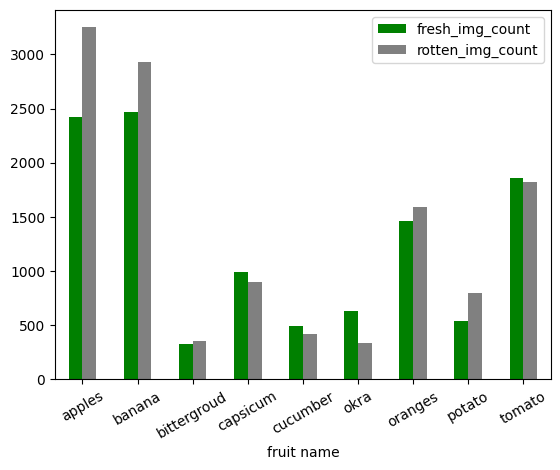

In [29]:
visualize(train_data_path, train_fruits)

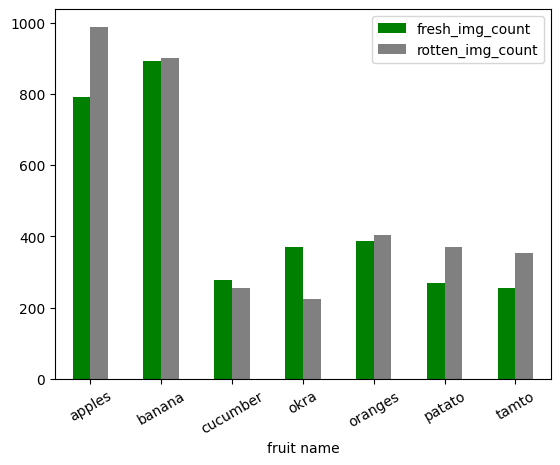

In [30]:
visualize(test_data_path, test_fruits)

In [31]:
train_categories.remove('freshbittergroud')
train_categories.remove('freshcapsicum')
train_categories.remove('rottenbittergroud')
train_categories.remove('rottencapsicum')



In [32]:
test_categories

['freshapples',
 'freshbanana',
 'freshcucumber',
 'freshokra',
 'freshoranges',
 'freshpatato',
 'freshtamto',
 'rottenapples',
 'rottenbanana',
 'rottencucumber',
 'rottenokra',
 'rottenoranges',
 'rottenpatato',
 'rottentamto']

In [33]:
train_categories

['freshapples',
 'freshbanana',
 'freshcucumber',
 'freshokra',
 'freshoranges',
 'freshpotato',
 'freshtomato',
 'rottenapples',
 'rottenbanana',
 'rottencucumber',
 'rottenokra',
 'rottenoranges',
 'rottenpotato',
 'rottentomato']

In [34]:
def preprocess(dataset):
    root_source = f'D:\\NSP\\data\\{dataset}'
    features = []
    labels = []
    if dataset == 'Train':
        categories = train_categories
    else:
        categories = test_categories
    for cat in categories:
        source = os.path.join(root_source, cat)
        for image in os.listdir(source):
            img = Image.open(os.path.join(source, image))
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_feature = np.array(img.resize((150, 150))).flatten()
            features.append(img_feature)
            labels.append(categories.index(cat))
    return features, labels

In [35]:
train_X, train_y = preprocess('Train')

In [36]:
test_X, test_y = preprocess('Test')

In [37]:
len(train_X), len(test_X)

(21044, 6738)

In [38]:
#Saving the train and test data in working directory
train_Xdata = 'test_X.pkl'  
train_ydata = 'test_y.pkl'
with open(train_Xdata, 'wb') as file:  
    pickle.dump(train_X, file)
    
with open(train_ydata, 'wb') as file:  
    pickle.dump(train_y, file)

In [39]:
model = SVC(C = 1, kernel = 'rbf', gamma = 'auto')
model.fit(train_X, train_y)

SVC(C=1, gamma='auto')

In [40]:
# saving the model in working directory
model_file = 'model.pkl'
with open(model_file, 'wb') as file:  
    pickle.dump(model, file)

In [41]:
pred_y = model.predict(test_X)
accuracy = accuracy_score(test_y,pred_y)
print("Accuracy:", accuracy)

Accuracy: 0.688780053428317
